# Applied Math 50 Final Project
### By Marissa Zheng, Kyu Han, and Priyanka Kaul

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
from numpy import load

# Import speeddating.csv
uploaded = files.upload()

Saving speeddating.csv to speeddating.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['speeddating.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
# Clean data

vars_of_interest = ['gender',
                    'age',
                    'age_o',
                    'pref_o_attractive',
                    'pref_o_sincere',
                    'pref_o_intelligence',
                    'pref_o_funny',
                    'pref_o_ambitious',
                    'pref_o_shared_interests',
                    'attractive_o',
                    'sinsere_o',
                    'intelligence_o',
                    'funny_o',
                    'ambitous_o',
                    'shared_interests_o',
                    'attractive_important',
                    'sincere_important',
                    'intellicence_important',
                    'funny_important',
                    'ambtition_important',
                    'shared_interests_important',
                    'attractive',
                    'sincere',
                    'intelligence',
                    'funny',
                    'ambition',
                    'attractive_partner',
                    'sincere_partner',
                    'intelligence_partner',
                    'funny_partner',
                    'ambition_partner',
                    'shared_interests_partner',
                    'interests_correlate',
                    'like',
                    'guess_prob_liked',
                    'match']

df_clean = df[vars_of_interest]
#print(df_clean.info())

# Get rid of null entries (Nan)
df_clean = df_clean.dropna()
#print(df_clean.info())

# Turn any binary "yes or no" values represented as strings into float values (1 = match, 0 = no match)
df_clean = df_clean.replace(['b\'0\'', 'b\'1\'', 'b\'female\'', 'b\'male\''], [0.0, 1.0, 'female', 'male'])

# <center> Question 1 </center>

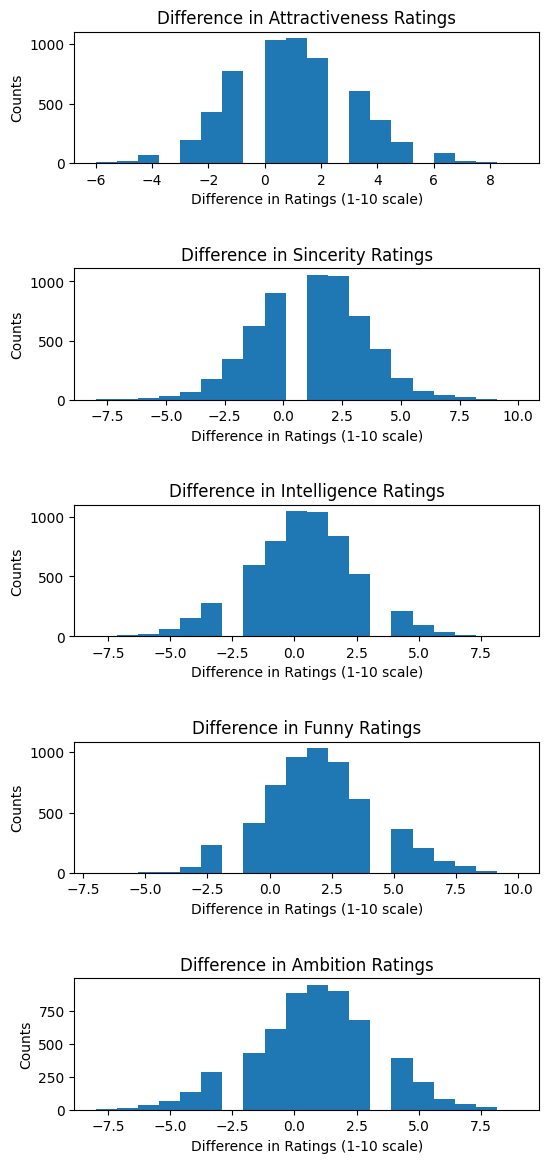

In [ ]:
# Plot 1: Histograms of the difference in subjects' self ratings of attributes vs. how their dates rated them

# Extract wanted variables from data frame (df_clean) and turn them into arrays
attractive_ratings = df_clean[['attractive', 'attractive_o']].to_numpy()
sincere_ratings = df_clean[['sincere', 'sinsere_o']].to_numpy()
intelligence_ratings = df_clean[['intelligence', 'intelligence_o']].to_numpy()
funny_ratings = df_clean[['funny', 'funny_o']].to_numpy()
ambitious_ratings = df_clean[['ambition', 'ambitous_o']].to_numpy()

# Make plots
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, figsize=(6, 14))

# Difference between ratinges (self rating - date's rating)
# Positive difference means the subject rated themselves higher than their date rated them
ax0.hist(np.subtract(attractive_ratings[:,0], attractive_ratings[:,1]), bins=20)
ax0.set_title('Difference in Attractiveness Ratings')
ax0.set_xlabel('Difference in Ratings (1-10 scale)')
ax0.set_ylabel('Counts')
ax1.hist(np.subtract(sincere_ratings[:,0], sincere_ratings[:,1]), bins=20)
ax1.set_title('Difference in Sincerity Ratings')
ax1.set_xlabel('Difference in Ratings (1-10 scale)')
ax1.set_ylabel('Counts')
ax2.hist(np.subtract(intelligence_ratings[:,0], intelligence_ratings[:,1]), bins=20)
ax2.set_title('Difference in Intelligence Ratings')
ax2.set_xlabel('Difference in Ratings (1-10 scale)')
ax2.set_ylabel('Counts')
ax3.hist(np.subtract(funny_ratings[:,0], funny_ratings[:,1]), bins=20)
ax3.set_title('Difference in Funny Ratings')
ax3.set_xlabel('Difference in Ratings (1-10 scale)')
ax3.set_ylabel('Counts')
ax4.hist(np.subtract(ambitious_ratings[:,0], ambitious_ratings[:,1]), bins=20)
ax4.set_title('Difference in Ambition Ratings')
ax4.set_xlabel('Difference in Ratings (1-10 scale)')
ax4.set_ylabel('Counts')
plt.subplots_adjust(hspace=.8)
plt.show()

1. compare participants rating of importance of an attribute vs rating for themselves

2. compare partner's rating of importance of an attribute vs partner's rating for participants

3. compare partner vs participant's rating of importance of an attribute

Colored the dots representing matches red and the dots representing non-matches blue

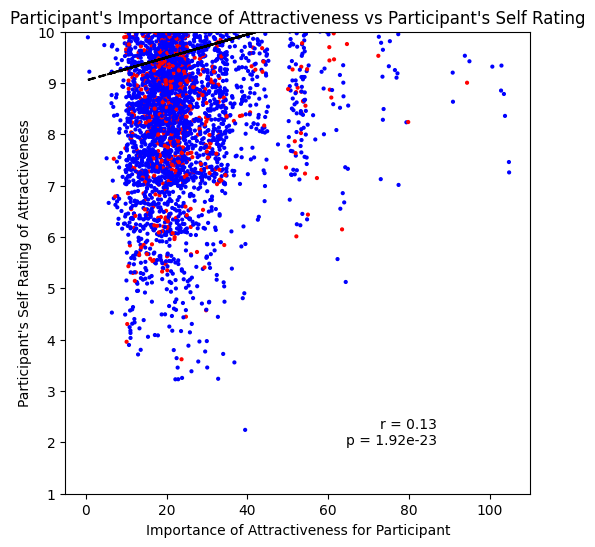

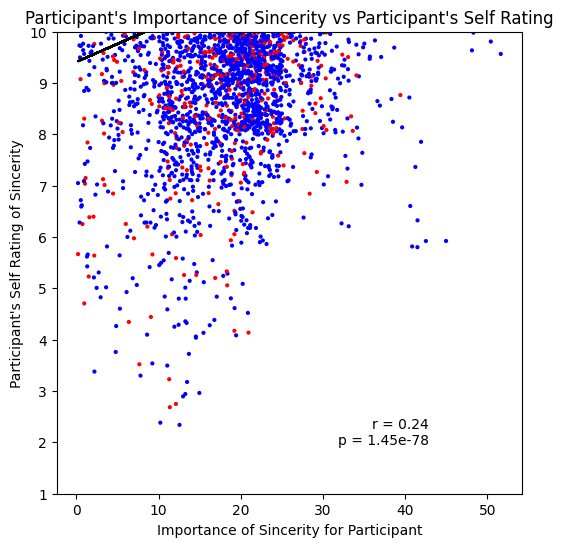

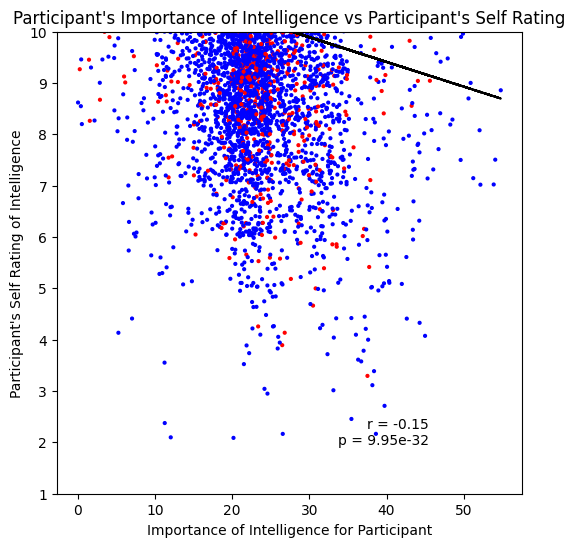

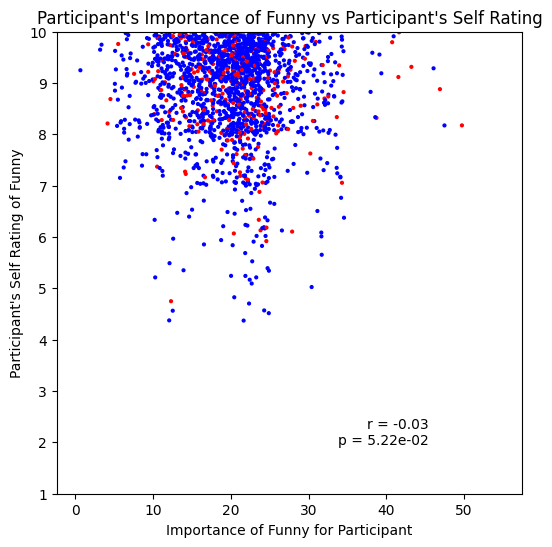

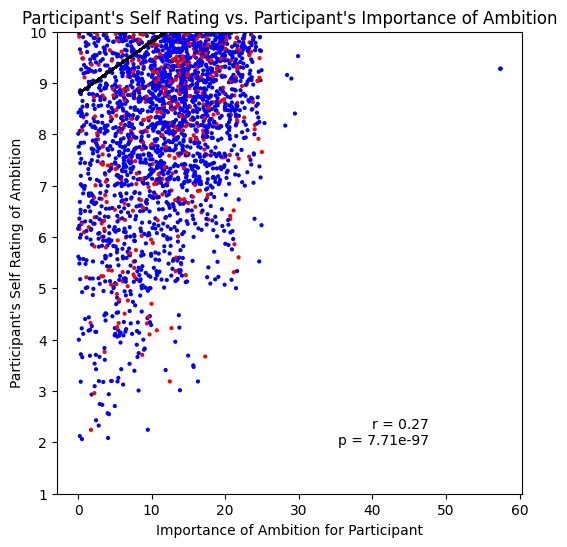

In [ ]:
# Plot: Scatterplots of participant's rating of importance of an attribute vs how they rated themselves

from scipy.stats import pearsonr

# Define a function to plot a scatterplot
def plot_scatter(x_var, y_var, title, y_label, x_label):
    fig, ax = plt.subplots(figsize=(6,6))
    # Add random noise to the data points
    x_var = x_var + np.random.rand(len(x_var)) * 5
    y_var = y_var + np.random.rand(len(y_var)) * 5
    # Set the color of each dot based on whether the date was a match or not
    color = df_clean["match"].map({0: "b", 1: "r"})
    ax.scatter(x_var, y_var, s=4, c=color)
    ax.set_title(title)
    ax.set_ylim(1, 10)
    ax.set_yticks(range(1, 11))
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    # Add a line of best fit
    z = np.polyfit(x_var, y_var, 1)
    p = np.poly1d(z)
    ax.plot(x_var, p(x_var), "k--")
    # Add correlation coefficients
    r, p_val = pearsonr(x_var, y_var)
    ax.text(0.8, 0.1, f"r = {r:.2f}\np = {p_val:.2e}", transform=ax.transAxes, ha='right', va='bottom')
    plt.show()

# Attractiveness
plot_scatter(df_clean['attractive_important'], df_clean['attractive'],
             "Participant's Importance of Attractiveness vs Participant's Self Rating",
             "Participant's Self Rating of Attractiveness",
             "Importance of Attractiveness for Participant")

# Sincerity
plot_scatter(df_clean['sincere_important'], df_clean['sincere'],
             "Participant's Importance of Sincerity vs Participant's Self Rating",
             "Participant's Self Rating of Sincerity",
             "Importance of Sincerity for Participant")

# Intelligence
plot_scatter(df_clean['intellicence_important'], df_clean['intelligence'],
             "Participant's Importance of Intelligence vs Participant's Self Rating",
             "Participant's Self Rating of Intelligence",
             "Importance of Intelligence for Participant")

# Funny
plot_scatter(df_clean['funny_important'], df_clean['funny'],
             "Participant's Importance of Funny vs Participant's Self Rating",
             "Participant's Self Rating of Funny",
             "Importance of Funny for Participant")

# Ambition
plot_scatter(df_clean['ambtition_important'], df_clean['ambition'],
             "Participant's Self Rating vs. Participant's Importance of Ambition",
             "Participant's Self Rating of Ambition",
             "Importance of Ambition for Participant")

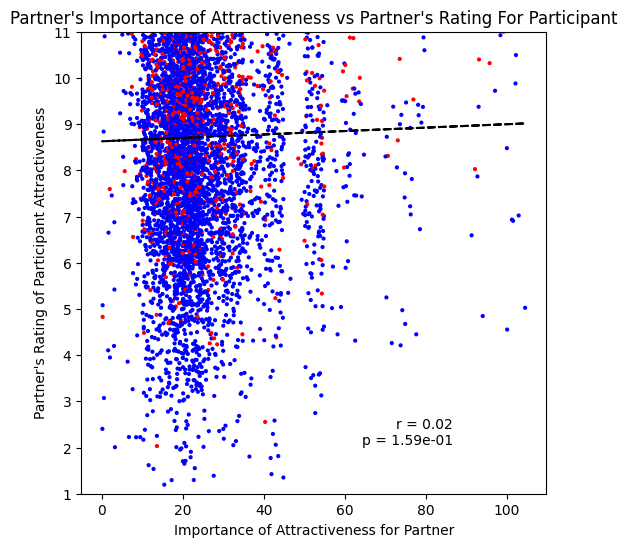

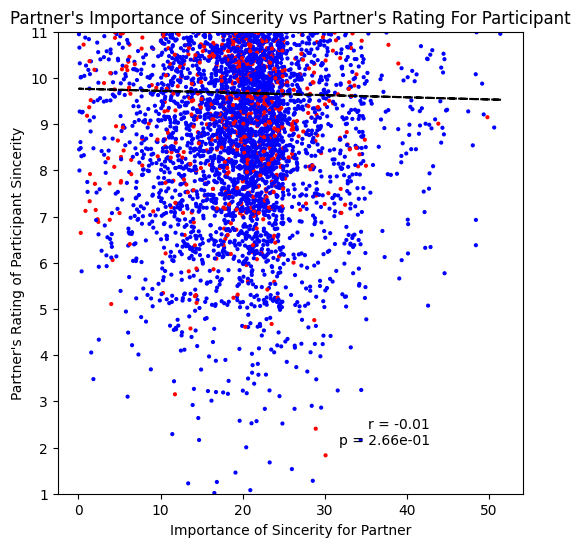

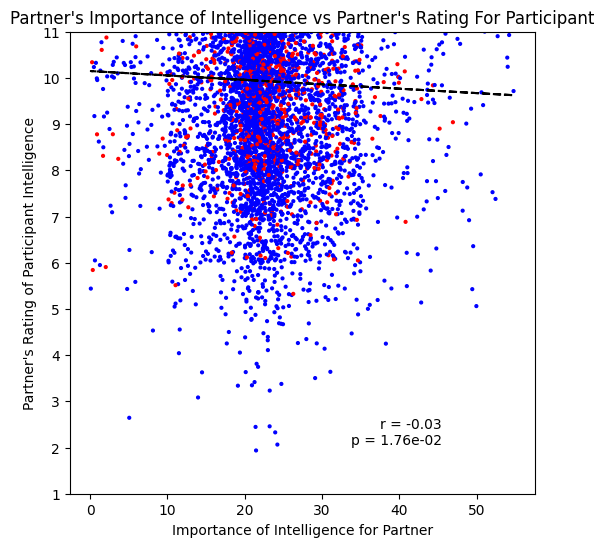

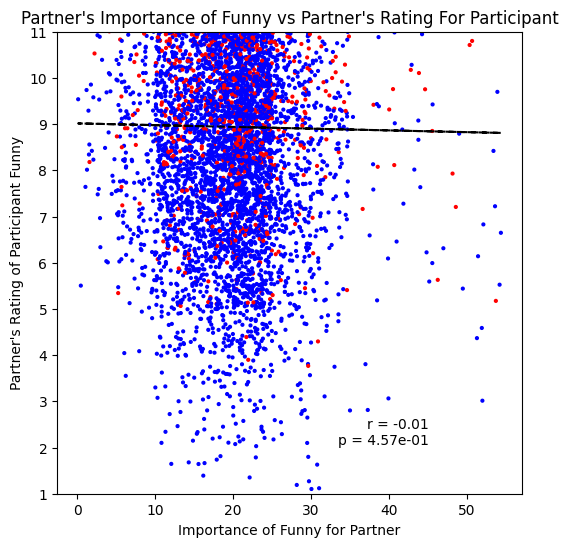

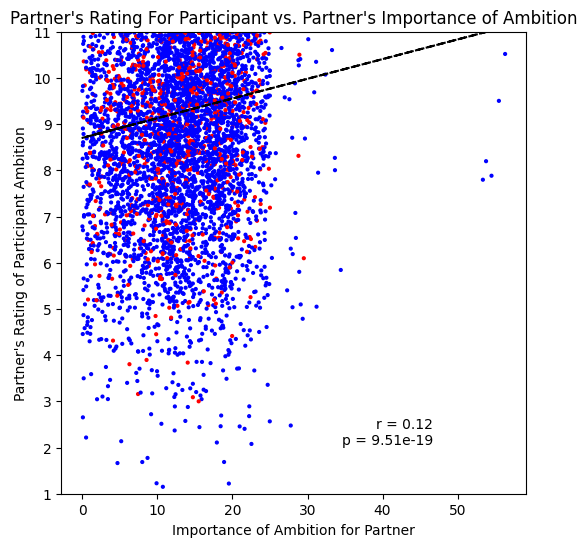

In [ ]:
# Plot: Scatterplots of partner's rating of importance of an attribute vs how partner rated them

# Define a function to plot a scatterplot
def plot_scatter(x_var, y_var, title, y_label, x_label):
    fig, ax = plt.subplots(figsize=(6,6))
    # Add random noise to the data points
    x_var = x_var + np.random.rand(len(x_var)) * 5
    y_var = y_var + np.random.rand(len(y_var)) * 5
    # Set the color of each dot based on whether the date was a match or not
    color = df_clean["match"].map({0: "b", 1: "r"})
    ax.scatter(x_var, y_var, s=4, c=color)
    ax.set_title(title)
    ax.set_ylim(1, 10)
    ax.set_yticks(range(1, 12))
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
   # Add a line of best fit
    z = np.polyfit(x_var, y_var, 1)
    p = np.poly1d(z)
    ax.plot(x_var, p(x_var), "k--")
    # Add correlation coefficients
    r, p_val = pearsonr(x_var, y_var)
    ax.text(0.8, 0.1, f"r = {r:.2f}\np = {p_val:.2e}", transform=ax.transAxes, ha='right', va='bottom')
    plt.show()

# Attractiveness
plot_scatter(df_clean['pref_o_attractive'], df_clean['attractive_o'],
             "Partner's Importance of Attractiveness vs Partner's Rating For Participant",
             "Partner's Rating of Participant Attractiveness",
             "Importance of Attractiveness for Partner")

# Sincerity
plot_scatter(df_clean['pref_o_sincere'], df_clean['sinsere_o'],
             "Partner's Importance of Sincerity vs Partner's Rating For Participant",
             "Partner's Rating of Participant Sincerity",
             "Importance of Sincerity for Partner")

# Intelligence
plot_scatter(df_clean['pref_o_intelligence'], df_clean['intelligence_o'],
             "Partner's Importance of Intelligence vs Partner's Rating For Participant",
             "Partner's Rating of Participant Intelligence",
             "Importance of Intelligence for Partner")

# Funny
plot_scatter(df_clean['pref_o_funny'], df_clean['funny_o'],
             "Partner's Importance of Funny vs Partner's Rating For Participant",
             "Partner's Rating of Participant Funny",
             "Importance of Funny for Partner")

# Ambition
plot_scatter(df_clean['pref_o_ambitious'], df_clean['ambitous_o'],
             "Partner's Rating For Participant vs. Partner's Importance of Ambition",
             "Partner's Rating of Participant Ambition",
             "Importance of Ambition for Partner")

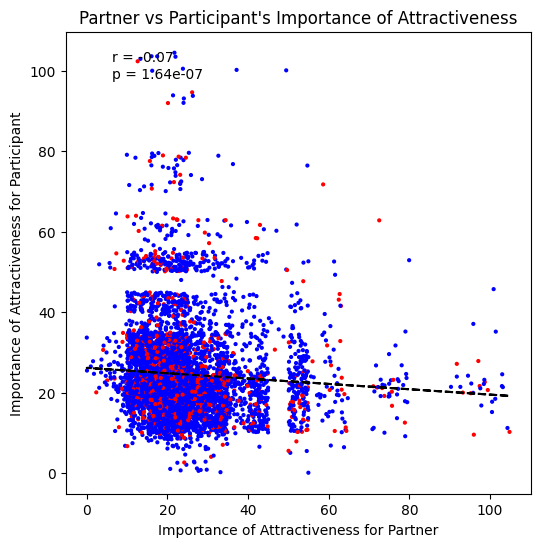

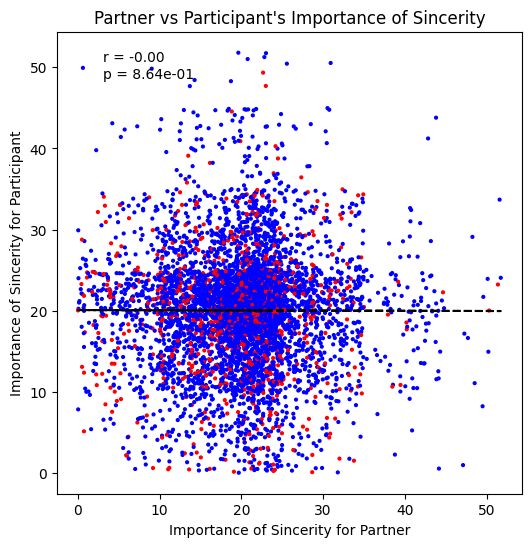

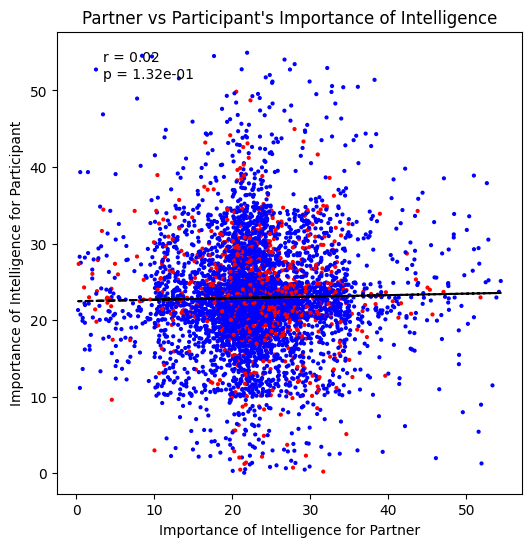

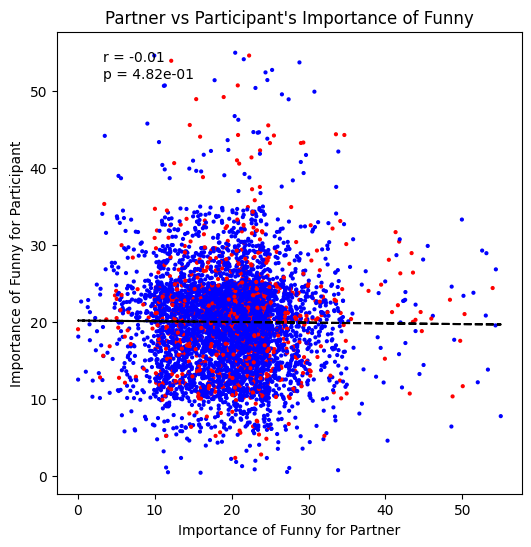

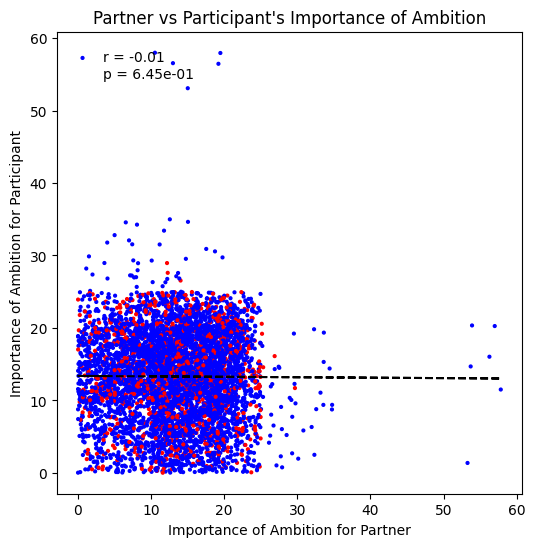

In [ ]:
# Plot: Scatterplots of participant vs partner's rating of importance of an attribute

from scipy.stats import pearsonr

# Define a function to plot a scatterplot
def plot_scatter(x_var, y_var, title, y_label, x_label):
    fig, ax = plt.subplots(figsize=(6,6))
    # Add random noise to the data points
    x_var = x_var + np.random.rand(len(x_var)) * 5
    y_var = y_var + np.random.rand(len(y_var)) * 5
    # Set the color of each dot based on whether the date was a match or not
    color = df_clean["match"].map({0: "b", 1: "r"})
    ax.scatter(x_var, y_var, s=4, c=color)
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    # Add a line of best fit
    z = np.polyfit(x_var, y_var, 1)
    p = np.poly1d(z)
    ax.plot(x_var, p(x_var), "k--")
    # Add correlation coefficients
    r, p_val = pearsonr(x_var, y_var)
    ax.text(0.1, 0.9, f"r = {r:.2f}\np = {p_val:.2e}", transform=ax.transAxes)
    plt.show()

# Attractiveness
plot_scatter(df_clean['pref_o_attractive'], df_clean['attractive_important'],
             "Partner vs Participant's Importance of Attractiveness",
             "Importance of Attractiveness for Participant",
             "Importance of Attractiveness for Partner")

# Sincerity
plot_scatter(df_clean['pref_o_sincere'], df_clean['sincere_important'],
             "Partner vs Participant's Importance of Sincerity",
             "Importance of Sincerity for Participant",
             "Importance of Sincerity for Partner")

# Intelligence
plot_scatter(df_clean['pref_o_intelligence'], df_clean['intellicence_important'],
             "Partner vs Participant's Importance of Intelligence",
             "Importance of Intelligence for Participant",
             "Importance of Intelligence for Partner")

# Funny
plot_scatter(df_clean['pref_o_funny'], df_clean['funny_important'],
             "Partner vs Participant's Importance of Funny",
             "Importance of Funny for Participant",
             "Importance of Funny for Partner")

# Ambition
plot_scatter(df_clean['pref_o_ambitious'], df_clean['ambtition_important'],
             "Partner vs Participant's Importance of Ambition",
             "Importance of Ambition for Participant",
             "Importance of Ambition for Partner")

# <center> Question 2 </center>

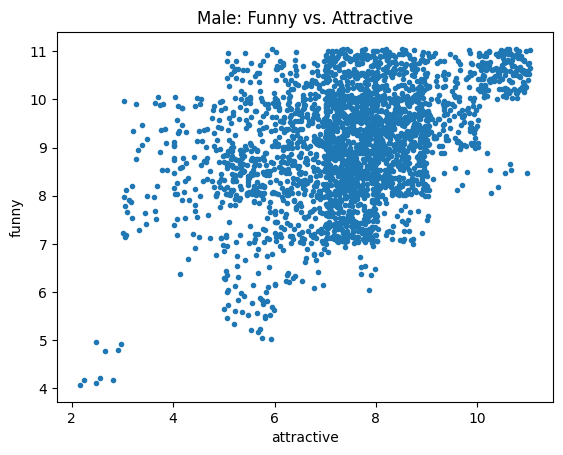

Correlation Coefficient:  0.40181584895295386


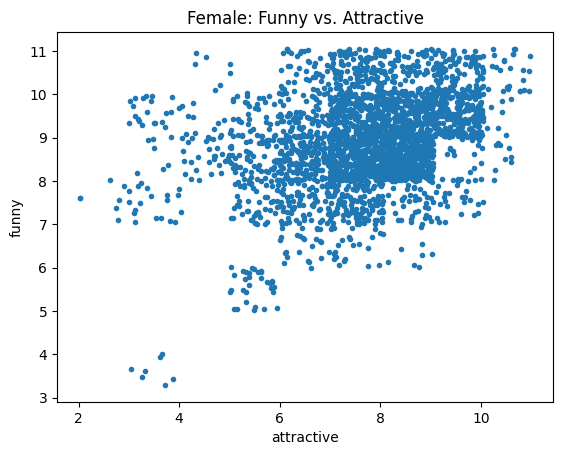

Correlation Coefficient:  0.3282484651054171


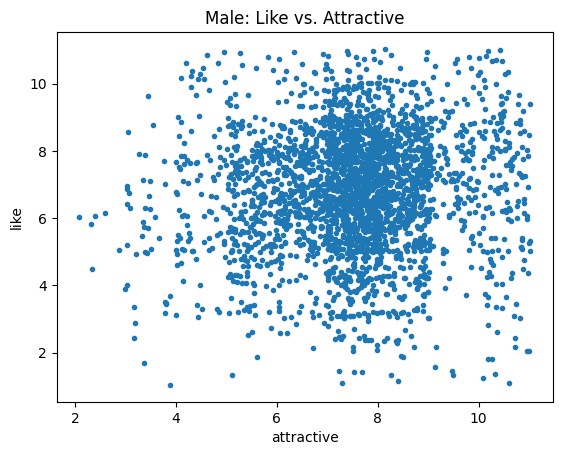

Correlation Coefficient:  0.06711906936471475


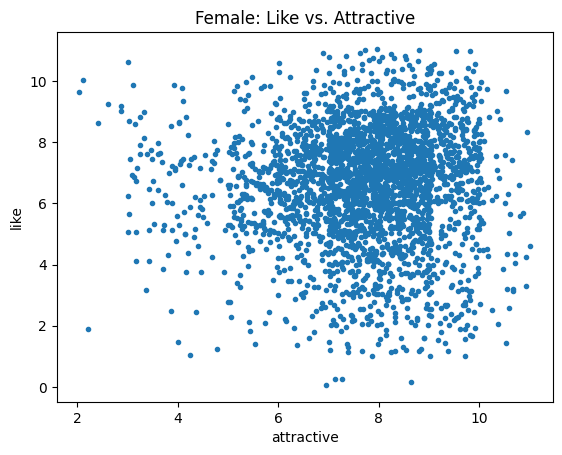

Correlation Coefficient:  0.018874963466779308


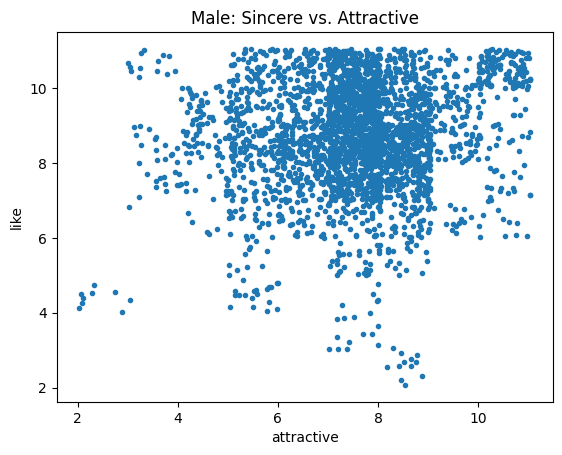

Correlation Coefficient:  0.11916929014681767


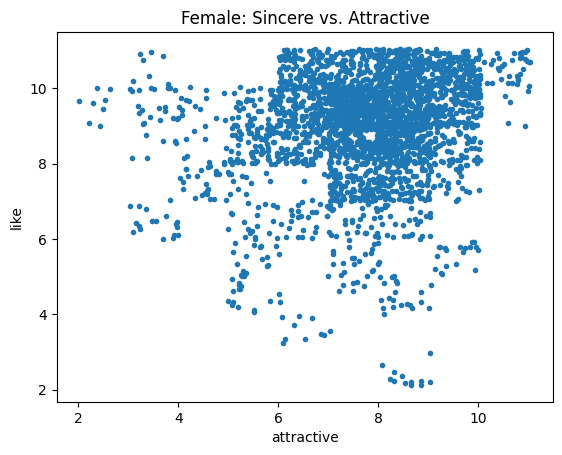

Correlation Coefficient:  0.17913838937393084


In [ ]:
# Creating scatter plots by gender, exploring how attractiveness influences other ratings

def plot_scatter_gendered(gender, x_var, y_var, title, y_label, x_label):
    cleaned = df_clean['gender'] == gender
    x_adj = x_var[cleaned]
    y_adj = y_var[cleaned]
    # Add random noise to the data points
    x_adj += (np.random.rand(len(x_adj)) * 1.05)
    y_adj += (np.random.rand(len(y_adj)) * 1.05)
    plt.plot(x_adj, y_adj, '.')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print("Correlation Coefficient: ", np.corrcoef(x_adj, y_adj)[0, 1])
    return

# Attractiveness and Funny
plot_scatter_gendered('male', df_clean['attractive'], df_clean['funny'], "Male: Funny vs. Attractive", "funny", "attractive")
plot_scatter_gendered('female', df_clean['attractive'], df_clean['funny'], "Female: Funny vs. Attractive", "funny", "attractive")

# Attractiveness and Like
plot_scatter_gendered('male', df_clean['attractive'], df_clean['like'], "Male: Like vs. Attractive", "like", "attractive")
plot_scatter_gendered('female', df_clean['attractive'], df_clean['like'], "Female: Like vs. Attractive", "like", "attractive")

# Attractiveness and Sincere
plot_scatter_gendered('male', df_clean['attractive'], df_clean['sincere'], "Male: Sincere vs. Attractive", "like", "attractive")
plot_scatter_gendered('female', df_clean['attractive'], df_clean['sincere'], "Female: Sincere vs. Attractive", "like", "attractive")

# <center> Question 3 </center>

In [ ]:
# Modeling
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn import utils

# Split train and test data indices (draw without replacement)
def split_train_test_indices(size, size_to_draw_from):
    draw_from = (np.linspace(0, size_to_draw_from-1, size_to_draw_from))
    train_indices = np.array([])

    while len(train_indices) < size:
        num_needed = size-len(train_indices)
        rand = np.random.rand(1, num_needed)
        i_arr = (np.rint(rand*(len(draw_from))-1)).astype(int)
        train_indices = np.union1d(train_indices, draw_from[i_arr])
        draw_from = np.setdiff1d(draw_from, train_indices)

    test_indices = np.setdiff1d(np.linspace(0, size_to_draw_from-1, size_to_draw_from), train_indices)
    return (train_indices.astype(int), test_indices.astype(int))

def run_Poisson_model(x_data, y_data, train_indices, test_indices):
    poisson_model = linear_model.PoissonRegressor()
    train_data_x = x_data[train_indices]
    train_data_y = y_data[train_indices]
    test_data_x = x_data[test_indices]
    test_data_y = y_data[test_indices]

    poisson_model = poisson_model.fit(train_data_x, train_data_y)
    score = poisson_model.score(test_data_x, test_data_y)
    coeffs = poisson_model.coef_
    predicted_y_test_data = poisson_model.predict(test_data_x)

    return ([score, coeffs, predicted_y_test_data], [train_data_x, train_data_y, test_data_x, test_data_y])

def run_Logistic_Regression_model(x_data, y_data, train_indices, test_indices):
    log_reg_model = linear_model.LogisticRegression(solver='saga')
    train_data_x = x_data[train_indices]
    train_data_y = y_data[train_indices]
    test_data_x = x_data[test_indices]
    test_data_y = y_data[test_indices]

    log_reg_model = log_reg_model.fit(train_data_x, train_data_y)
    score = log_reg_model.score(test_data_x, test_data_y)
    coeffs = log_reg_model.coef_
    predicted_y_test_data = log_reg_model.predict(test_data_x)

    print(classification_report(test_data_y, predicted_y_test_data))

    return ([score, coeffs, predicted_y_test_data], [train_data_x, train_data_y, test_data_x, test_data_y])

def run_Logistic_Regression_model_multinomial(x_data, y_data, train_indices, test_indices):
    log_reg_model = linear_model.LogisticRegression(solver='saga', multi_class='multinomial')
    train_data_x = x_data[train_indices]
    train_data_y = y_data[train_indices]
    test_data_x = x_data[test_indices]
    test_data_y = y_data[test_indices]

    log_reg_model = log_reg_model.fit(train_data_x, train_data_y)
    score = log_reg_model.score(test_data_x, test_data_y)
    coeffs = log_reg_model.coef_
    predicted_y_test_data = log_reg_model.predict(test_data_x)

    print(classification_report(test_data_y, predicted_y_test_data))

    return ([score, coeffs, predicted_y_test_data], [train_data_x, train_data_y, test_data_x, test_data_y])

In [ ]:
# Separate train and test data
num_data = df_clean.shape[0]
size_train = int(.8*num_data)
size_test = num_data - size_train

# Split train and test indices
train_i, test_i = split_train_test_indices(size_train, num_data)

In [ ]:
# Formatting input features and test outputs
self_ratings = df_clean[['attractive', 'sincere', 'intelligence', 'funny', 'ambition']].to_numpy()
ratings_of_partner = df_clean[['attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner']].to_numpy()
partner_rate_me = df_clean[['attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o',]].to_numpy()
shared_interest_rating = df_clean['shared_interests_partner'].to_numpy()

like_ratings = np.rint(df_clean['like'].to_numpy())
match_decisions = df_clean['match'].to_numpy()

#convert like ratings to categorical values
lab = preprocessing.LabelEncoder()
like_ratings = lab.fit_transform(like_ratings)

In [ ]:
# Model 1
# input: partner_ratings
results, data = run_Logistic_Regression_model_multinomial(np.column_stack((ratings_of_partner, shared_interest_rating)), like_ratings, train_i, test_i)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.05      0.10        19
           2       0.00      0.00      0.00        27
           3       0.14      0.05      0.07        63
           4       0.25      0.04      0.08        90
           5       0.28      0.31      0.29       186
           6       0.40      0.55      0.46       257
           7       0.43      0.60      0.50       256
           8       0.39      0.43      0.41       166
           9       0.00      0.00      0.00        53
          10       0.00      0.00      0.00        28

    accuracy                           0.38      1147
   macro avg       0.22      0.18      0.17      1147
weighted avg       0.32      0.38      0.33      1147



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

In [ ]:
# Model 2
# input: self-ratings, partner_ratings
results1, data1 = run_Logistic_Regression_model_multinomial(np.column_stack((self_ratings, ratings_of_partner, shared_interest_rating)), like_ratings, train_i, test_i)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.57      0.21      0.31        19
           2       0.17      0.15      0.16        27
           3       0.19      0.10      0.13        63
           4       0.35      0.13      0.19        90
           5       0.32      0.34      0.33       186
           6       0.40      0.51      0.45       257
           7       0.40      0.53      0.46       256
           8       0.38      0.39      0.39       166
           9       0.18      0.04      0.06        53
          10       0.46      0.21      0.29        28

    accuracy                           0.37      1147
   macro avg       0.31      0.24      0.25      1147
weighted avg       0.36      0.37      0.35      1147



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

In [ ]:
# Model 3
# input: mutual ratings

results, data = run_Logistic_Regression_model(np.column_stack((partner_rate_me, ratings_of_partner, shared_interest_rating)), match_decisions, train_i, test_i)

print("Score:", results[0])

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       953
         1.0       0.74      0.27      0.40       194

    accuracy                           0.86      1147
   macro avg       0.80      0.63      0.66      1147
weighted avg       0.85      0.86      0.83      1147

Score: 0.8605056669572798


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# input: self ratings + mutual ratings

results, data = run_Logistic_Regression_model(np.column_stack((self_ratings, partner_rate_me, ratings_of_partner, shared_interest_rating)), match_decisions, train_i, test_i)

print("Score:", results[0])

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       953
         1.0       0.68      0.25      0.36       194

    accuracy                           0.85      1147
   macro avg       0.77      0.61      0.64      1147
weighted avg       0.83      0.85      0.82      1147

Score: 0.8526591107236269


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
test_data = match_decisions[test_i]
n_0 = test_data[test_data == 0]
n_1 = test_data[test_data == 1]
single_guess_strategy_performance = len(n_0)/len(test_data)

print("Accuracy of always guessing no match (0):", single_guess_strategy_performance)

Accuracy of always guessing no match (0): 0.8308631211857018
